In [1]:
import numpy as np
import pandas as pd
import random
import pylab
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def compute_cost_function(m, t0, t1, x, y):
  return 1/2/m * sum([(t0 + t1* np.asarray([x[i]]) - y[i])**2 for i in range(m)])

In [10]:
costarr=[]
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=1000):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = 20
    t1 = 1

    # total error, J(theta)
    J = compute_cost_function(m, t0, t1, x, y)
    print('J=', J);
    # Iterate Loop
    num_iter = 0
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i])*np.asarray([x[i]]) for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
    
        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        e = compute_cost_function(m, t0, t1, x, y)
        costarr.append(e)
        
        print ('J = ', e)
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print ('Max interactions exceeded!')
            converged = True

    return t0,t1

In [6]:
def plot_cost_function(x, y, m):
    t0 = list(range(0, x.shape[0]))
    j_values = []
    for i in range(len(t0)):
        j_values.append(compute_cost_function(m, i, i, x, y)[0])
    print ('j_values', len(j_values), len(x), len(y))
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(x, y, j_values, label='parametric curve')
    ax.legend()
    plt.show()

J= [3.19938761]
J =  [2.99655754]
J =  [2.88016441]
J =  [2.81335982]
J =  [2.77500414]
J =  [2.7529697]
J =  [2.74029896]
J =  [2.73300042]
J =  [2.72878419]
J =  [2.72633657]
J =  [2.72490391]
J =  [2.72405382]
J =  [2.72353826]
J =  [2.72321491]
J =  [2.72300213]
J =  [2.72285309]
J =  [2.72274089]
J =  [2.72265013]
J =  [2.72257194]
J =  [2.72250126]
J =  [2.72243515]
J =  [2.72237195]
J =  [2.72231069]
J =  [2.72225082]
J =  [2.722192]
J =  [2.72213406]
J =  [2.72207688]
J =  [2.7220204]
J =  [2.72196457]
J =  [2.72190937]
J =  [2.72185479]
J =  [2.7218008]
J =  [2.7217474]
J =  [2.72169458]
J =  [2.72164234]
J =  [2.72159066]
J =  [2.72153954]
J =  [2.72148897]
J =  [2.72143895]
J =  [2.72138947]
J =  [2.72134053]
J =  [2.72129211]
J =  [2.72124422]
J =  [2.72119684]
J =  [2.72114998]
J =  [2.72110363]
J =  [2.72105778]
J =  [2.72101242]
J =  [2.72096755]
J =  [2.72092317]
J =  [2.72087927]
J =  [2.72083584]
J =  [2.72079288]
J =  [2.72075039]
J =  [2.72070835]
J =  [2.72066678]


J =  [2.71690976]
J =  [2.71690925]
J =  [2.71690875]
J =  [2.71690826]
J =  [2.71690777]
J =  [2.71690729]
J =  [2.71690682]
J =  [2.71690634]
J =  [2.71690588]
J =  [2.71690542]
J =  [2.71690496]
J =  [2.71690451]
J =  [2.71690406]
J =  [2.71690362]
J =  [2.71690318]
J =  [2.71690275]
J =  [2.71690232]
J =  [2.7169019]
J =  [2.71690148]
J =  [2.71690107]
J =  [2.71690066]
J =  [2.71690025]
J =  [2.71689985]
J =  [2.71689946]
J =  [2.71689907]
J =  [2.71689868]
J =  [2.71689829]
J =  [2.71689791]
J =  [2.71689754]
J =  [2.71689717]
J =  [2.7168968]
J =  [2.71689644]
J =  [2.71689608]
J =  [2.71689572]
J =  [2.71689537]
J =  [2.71689502]
J =  [2.71689468]
J =  [2.71689434]
J =  [2.716894]
J =  [2.71689367]
J =  [2.71689334]
Max interactions exceeded!
theta0 = [19.60848268] theta1 = [0.88712141]


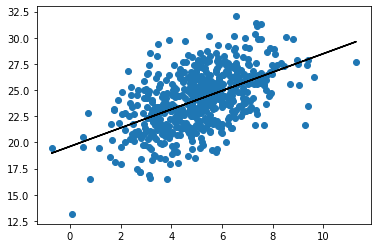

Done!


In [11]:
if __name__ == '__main__':
  
    df = pd.read_csv('6.txt', names=['x','y'])
    x = df['x']
    y = df['y']
     
    alpha = 0.06 # learning rate
    ep = 0.0001 # convergence criteria

    # call gradient decent, and get intercept(=theta0) and slope(=theta1)
    theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=500)
    print ('theta0 = ' + str(theta0)+' theta1 = '+str(theta1))
    #plot_cost_function(x, y, x.shape[0])

    # plot
    for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x 

    pylab.plot(x,y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()
    print ("Done!")
    
    #training and testing set with error 

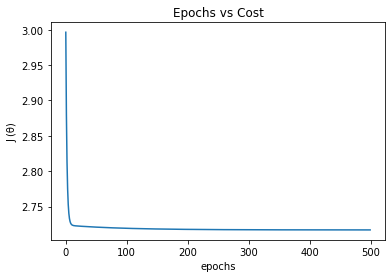

In [15]:
x=[i for i in range(0,len(costarr))]
plt.plot(x,costarr)
plt.xlabel('epochs')
plt.ylabel("J (θ)")
plt.title("Epochs vs Cost")
plt.show()